<a href="https://colab.research.google.com/github/JelanAngeloBLoy-a/CPE-031-Visualization-and-Data-Analysis/blob/main/Hands_On_Activity_14___Telling_the_Truth_with_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 14 | Telling the Truth with Data Visualization**





---



:Name : Loterte, Mark David & Loy-a, Jelan Angelo B.<br>
Course Code and Title : CPE 031 - Visualizations and Data Analysis<br>
Date Submitted : November 11, 2025<br>
Instructor : Maria Rizette Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to visualize data truthfully and ethically. Students will identify missing or biased data, correct misleading visualizations, and apply techniques to ensure integrity in data presentation.

**2. Intended Learning Outcomes (ILOs):**

By the end of this activity, students should be able to:

1. Analyze datasets to detect missing values, errors, and biases.

2. Evaluate the accuracy and fairness of different data visualization designs.

3. Create ethical and truthful charts by correcting deceptive visualizations.

**3. Discussions:**

Telling the truth with data visualization means ensuring that every visual accurately represents the data and context without distortion.
Misleading charts can manipulate interpretation through poor scaling, selective data, or biased representation.

Missing Data and Data Errors:
Missing values or outliers can lead to incorrect conclusions if ignored. Visualizations should either indicate missing data or use methods like interpolation or removal.

Biased Data:
Data can be biased through selection bias (only certain data is collected) or survivor bias (excluding failures or dropouts). Identifying these biases prevents misleading visuals.

Adjusting for Inflation:
When comparing values over time (e.g., prices, income), data should be adjusted for inflation to reflect real value changes.

Deceptive Design:
Visualization design choices such as truncated axes, dual-axis charts, or selective time frames can distort perception. Ethical visualization maintains consistent scales and transparency.

**4. Procedures:**

Step 1: Import Libraries

In [ ]:
!pip install pandas plotly numpy
import pandas as pd
import numpy as np
import plotly.express as px

Step 2: Create a Sample Dataset

This dataset simulates product prices, sales, and inflation across years.

In [ ]:
# Sample data
years = np.arange(2015, 2025)
data = {
    "Year": years,
    "Sales": [120, 130, 150, 170, 200, np.nan, 240, 260, 290, 320],
    "Price": [50, 52, 55, 57, 60, 63, 65, 70, 75, 78],
    "InflationRate": [1.02, 1.03, 1.01, 1.05, 1.04, 1.03, 1.02, 1.03, 1.02, 1.02]
}

df = pd.DataFrame(data)
df.head()

,Year,Sales,Price,InflationRate
0,2015,120.0,50,1.02
1,2016,130.0,52,1.03
2,2017,150.0,55,1.01
3,2018,170.0,57,1.05
4,2019,200.0,60,1.04


Step 3: Identify Missing Data and Errors

In [ ]:
# Check missing and invalid data
print("Missing Data per Column:")
print(df.isna().sum())

# Fill or interpolate missing sales values
df["Sales"] = df["Sales"].interpolate()
df

Missing Data per Column:
Year             0
Sales            1
Price            0
InflationRate    0
dtype: int64


,Year,Sales,Price,InflationRate
0,2015,120.0,50,1.02
1,2016,130.0,52,1.03
2,2017,150.0,55,1.01
3,2018,170.0,57,1.05
4,2019,200.0,60,1.04
5,2020,220.0,63,1.03
6,2021,240.0,65,1.02
7,2022,260.0,70,1.03
8,2023,290.0,75,1.02
9,2024,320.0,78,1.02


Step 4: Adjust for Inflation

In [ ]:
# Adjust sales for inflation
df["Adjusted_Sales"] = df["Sales"] / df["InflationRate"].cumprod()
fig = px.line(df, x="Year", y=["Sales", "Adjusted_Sales"],
              title="Sales Over Time (Adjusted for Inflation)",
              labels={"value": "Sales", "variable": "Metric"})
fig.show()

Step 5: Demonstrate Deceptive Design

Bad Example (Truncated Axis):

In [ ]:
bad_chart = px.bar(df, x="Year", y="Sales", title="Deceptive Chart (Truncated Axis)")
bad_chart.update_yaxes(range=[150, 350])  # starts too high
bad_chart.show()

Good Example (Honest Axis):

In [ ]:
good_chart = px.bar(df, x="Year", y="Sales", title="Truthful Chart (Proper Scale)")
good_chart.update_yaxes(range=[0, 350])
good_chart.show()

**Task 1:** Handling Missing and Erroneous Data

Identify missing or inconsistent data points in your own dataset (or this one).

Apply at least one correction method (interpolation, imputation, or exclusion).

Visualize the corrected dataset.

In [ ]:
years = np.arange(2015, 2026)
data = {
    "Year": years,
    "Sales_ProductA": [10000, 11000, 10500, 11500, np.nan, 13000, 12500, 12800, 13500, 12200, 13800],
    "Sales_ProductB": [8000, 9000, np.nan, 9200, 9500, 10000, 9800, np.nan, 10800, 10000, 11000],
    "Sales_ProductC": [2000, 2000, 2000, 2000, 1500, np.nan, 1700, 1000, 700, 800, 200],
}

df = pd.DataFrame(data)
display(df)
print("Missing Data per Column:")
print(df.isna().sum())

print("Estimated Dataset using Interpolation")
df["Sales_ProductA"] = df["Sales_ProductA"].interpolate()
df["Sales_ProductB"] = df["Sales_ProductB"].interpolate()
df["Sales_ProductC"] = df["Sales_ProductC"].interpolate()

df

Interpolated_Data = px.line(df, x="Year", y=["Sales_ProductA", "Sales_ProductB", "Sales_ProductC"],
              title="Interpolated Data")
Interpolated_Data.show()

,Year,Sales_ProductA,Sales_ProductB,Sales_ProductC
0,2015,10000.0,8000.0,2000.0
1,2016,11000.0,9000.0,2000.0
2,2017,10500.0,NaN,2000.0
3,2018,11500.0,9200.0,2000.0
4,2019,NaN,9500.0,1500.0
5,2020,13000.0,10000.0,NaN
6,2021,12500.0,9800.0,1700.0
7,2022,12800.0,NaN,1000.0
8,2023,13500.0,10800.0,700.0
9,2024,12200.0,10000.0,800.0


Missing Data per Column:
Year              0
Sales_ProductA    1
Sales_ProductB    2
Sales_ProductC    1
dtype: int64
Estimated Dataset using Interpolation


**Task 2:** Detecting and Correcting Bias

Create or simulate a biased dataset (e.g., only showing top-performing products or regions).

1. Visualize the biased data.

2. Then, include the full dataset and create a truthful comparison chart.

3. Briefly explain how bias affected interpretation.

In [ ]:
years = np.arange(2015, 2026)
data = {
    "Year": years,
    "Sales_ProductA": [10000, 11000, 10500, 11500, 12000, 13000, 12500, 12800, 13500, 12200, 13800],
    "Sales_ProductB": [8000, 9000, 8500, 9200, 9500, 10000, 9800, 10200, 10800, 10000, 11000],
    "Sales_ProductC": [2000, 2000, 2000, 2000, 1500, 2000, 1700, 1000, 700, 800, 200],
}

df = pd.DataFrame(data)
display(df)


df_biased = df[["Year", "Sales_ProductA", "Sales_ProductB"]]
display(df_biased)


fig_biased = px.line(df_biased, x="Year", y=["Sales_ProductA", "Sales_ProductB"],
              title="Biased Sales Over Time (Only Top Products)")
fig_biased.show()

fig_truthful = px.line(df, x="Year", y=["Sales_ProductA", "Sales_ProductB", "Sales_ProductC"],
              title="Truthful Sales Over Time (All Products)")
fig_truthful.show()



,Year,Sales_ProductA,Sales_ProductB,Sales_ProductC
0,2015,10000,8000,2000
1,2016,11000,9000,2000
2,2017,10500,8500,2000
3,2018,11500,9200,2000
4,2019,12000,9500,1500
5,2020,13000,10000,2000
6,2021,12500,9800,1700
7,2022,12800,10200,1000
8,2023,13500,10800,700
9,2024,12200,10000,800


,Year,Sales_ProductA,Sales_ProductB
0,2015,10000,8000
1,2016,11000,9000
2,2017,10500,8500
3,2018,11500,9200
4,2019,12000,9500
5,2020,13000,10000
6,2021,12500,9800
7,2022,12800,10200
8,2023,13500,10800
9,2024,12200,10000


Bias in interpretation and display of datasets can lead in questionable conclusions, especially when cross-referencing with external datasets. In the case of this biased dataset, we interpret that this company top performing in terms of sales when in fact, the company actually has another product that is doing poorly.
___

**Task 3:** Deceptive vs. Truthful Visualization

Create one misleading chart using axis manipulation or selective data range.

Create a corrected version that shows the same data honestly.

Explain the difference in interpretation between the two visuals.

In [ ]:

fig_misleading = px.line(df, x="Year", y="Sales_ProductA",
                         title="Misleading Sales of Product A (Truncated Axis)")
fig_misleading.update_yaxes(range=[11000, 14000])
fig_misleading.show()

fig_truthful_task3 = px.line(df, x="Year", y="Sales_ProductA",
                             title="Truthful Sales of Product A (Proper Scale)")
fig_truthful_task3.update_yaxes(range=[0, df["Sales_ProductA"].max() * 1.1])
fig_truthful_task3.show()





---


**5. Supplementary Activity:**

Visual Truth Challenge

Create a small project where you visualize a real-world dataset (e.g., population, income, environmental data).

1. Detect and correct at least two forms of distortion (missing data, bias, or misleading scaling).

2. Annotate your charts with titles and labels explaining your corrections.

3. Reflect on how ethical visualization improves trust and understanding.

Original Data:
  Country  Population_2020  Population_2010
0       A             50.0               40
1       B             70.0               60
2       C              NaN               70
3       D             90.0               80
4       E             30.0               25


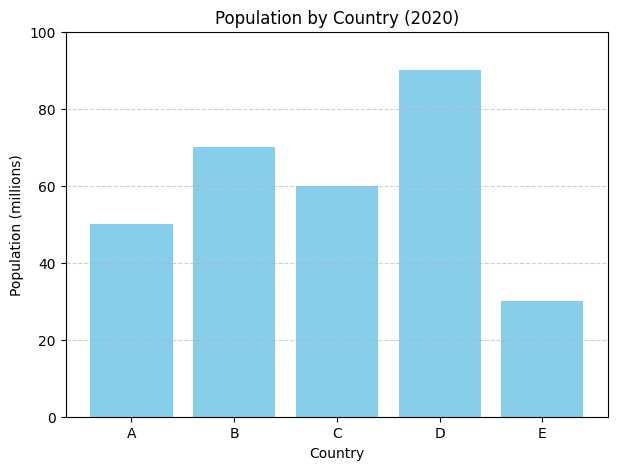

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Country': ['A', 'B', 'C', 'D', 'E'],
    'Population_2020': [50, 70, None, 90, 30],
    'Population_2010': [40, 60, 70, 80, 25]
}
df = pd.DataFrame(data)

print("Original Data:")
print(df)

df['Population_2020'] = df['Population_2020'].fillna(df['Population_2020'].mean())

df['Growth_%'] = ((df['Population_2020'] - df['Population_2010']) / df['Population_2010']) * 100

plt.figure(figsize=(7, 5))
plt.bar(df['Country'], df['Population_2020'], color='skyblue')
plt.title('Population by Country (2020)')
plt.xlabel('Country')
plt.ylabel('Population (millions)')
plt.ylim(0, df['Population_2020'].max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Ethical visualization avoids misleading viewers. We corrected missing data by replacing it with the mean, and we used a full y-axis starting from zero to prevent exaggeration. These small steps make charts more accurate and trustworthy.

**6. Conclusion/Learnings/Analysis:**

We conclude that ethical practices in data visualization are critically important, demonstrating how even subtle manipulations like truncated axes or data omission can severely distort interpretation. Ensuring data integrity and using proper scaling are fundamental to building trust and conveying accurate insights through visualizations.